### Problem Statement
The global COVID-19 pandemic has caused significant disruptions, with varying impacts across different countries. Understanding trends, death rates, recovery rates, and the spread of the virus is critical for managing the pandemic effectively. The goal of this project is to analyze the COVID-19 data, identify key patterns, and build a forecasting model to predict future case trends, specifically focusing on India and global insights.

### Objectives
- To analyze and understand the global trends of COVID-19, focusing on case counts, death rates, and recovery rates.
- To evaluate the impact of COVID-19 in India, including death rates, recovery rates, and active cases.
- To build and assess the performance of a time-series forecasting model (Prophet) to predict future case trends.
- To identify countries with exceptionally high or low death and recovery rates and draw actionable insights for improvement.
- To provide recommendations for controlling the spread and improving recovery based on the analysis of global data.

### Goals

- Data Analysis: Analyze the COVID-19 data to uncover key insights related to case trends, death rates, recovery rates, and active cases across countries, with a focus on India.

- Trend Identification: Identify the global and regional trends in COVID-19 case growth, focusing on peak periods and patterns over time.

- Forecasting: Develop a reliable forecasting model using the Prophet model to predict future COVID-19 trends and evaluate its performance.

- Actionable Insights: Provide actionable recommendations for countries, especially India, on improving healthcare, reducing death rates, and enhancing recovery rates.

- Global Comparison: Compare India’s performance with other countries, particularly those with lower death rates and higher recovery rates, to identify best practices.

- Policy Recommendations: Suggest policies and preventive measures based on the findings to help mitigate future risks and improve the overall handling of the pandemic.


In [1]:
# importing the libraries for data transformation and cleaning:
import pandas as pd 
import numpy as np

In [2]:
# loading the dataset:
data= pd.read_csv('covid_19_clean_complete.csv')

#### Data Cleaning and Transformation

In [3]:
# Checking the null values

data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [4]:
# removing unnecessary columns
data = data.drop(['Province/State', 'Lat', 'Long'], axis = 1)

In [5]:
data.columns = data.columns.str.strip()

In [6]:
# changing data type of data column to datetime

data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  49068 non-null  object        
 1   Date            49068 non-null  datetime64[ns]
 2   Confirmed       49068 non-null  int64         
 3   Deaths          49068 non-null  int64         
 4   Recovered       49068 non-null  int64         
 5   Active          49068 non-null  int64         
 6   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 2.6+ MB


In [8]:
data.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,2020-01-22,0,0,0,0,Europe
2,Algeria,2020-01-22,0,0,0,0,Africa
3,Andorra,2020-01-22,0,0,0,0,Europe
4,Angola,2020-01-22,0,0,0,0,Africa


In [9]:
# sorting the data:
data = data.sort_values(by = ['Country/Region', 'Date'])

In [10]:
data.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,2020-01-22,0,0,0,0,Eastern Mediterranean
261,Afghanistan,2020-01-23,0,0,0,0,Eastern Mediterranean
522,Afghanistan,2020-01-24,0,0,0,0,Eastern Mediterranean
783,Afghanistan,2020-01-25,0,0,0,0,Eastern Mediterranean
1044,Afghanistan,2020-01-26,0,0,0,0,Eastern Mediterranean


### Expolaratory data analysis:

#### Trend Analysis of Confirmed COVID-19 Cases

In [11]:
# importing libraries for visualization:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
data = data.reset_index()

Text(0.5, 1.0, 'Trend analysis of Confirmed cases')

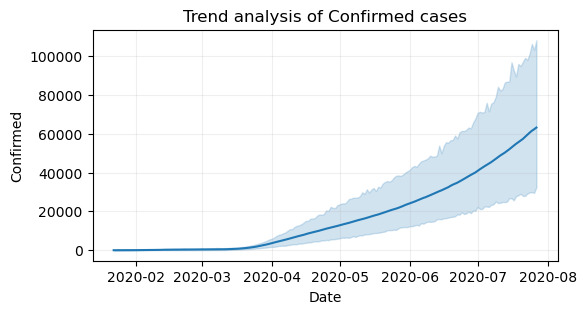

In [52]:
plt.figure(figsize = (6,3))
sns.lineplot(x = data['Date'] , y = data['Confirmed'])
plt.grid(True , alpha = .2)
plt.title('Trend analysis of Confirmed cases')

### Insight:
- Overall Trend: The number of confirmed COVID-19 cases has shown significant growth over time, with notable peaks.

#### Confirmed Cases Analysis Across Countries

In [14]:
# grouping the data
grouped_data = data.groupby('Country/Region')[['Confirmed','Active','Recovered','Deaths']].sum()

In [15]:
grouped_data  = grouped_data.reset_index()

In [16]:
grouped_data

,Country/Region,Confirmed,Active,Recovered,Deaths
0,Afghanistan,1936390,1089052,798240,49098
1,Albania,196702,72117,118877,5708
2,Algeria,1179755,345886,755897,77972
3,Andorra,94404,19907,69074,5423
4,Angola,22662,15011,6573,1078
...,...,...,...,...,...
182,West Bank and Gaza,233461,170967,61124,1370
183,Western Sahara,901,190,648,63
184,Yemen,67180,25694,23779,17707
185,Zambia,129421,43167,83611,2643


In [17]:
# Countries on peak in terms of cases
Top20_Countries_confirmed_cases = grouped_data.iloc[:,0:2].sort_values(by = 'Confirmed',ascending = False).head(20).reset_index(drop = True)
Top20_Countries_confirmed_cases

,Country/Region,Confirmed
0,US,224345948
1,Brazil,89524967
2,Russia,45408411
3,India,40883464
4,Spain,27404045
5,United Kingdom,26748587
6,Italy,26745145
7,France,21210926
8,Germany,21059152
9,Iran,19339267


Text(0.5, 1.0, 'Top 20 Countries')

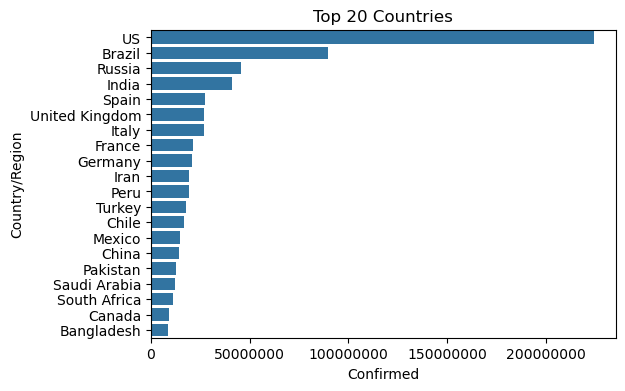

In [55]:
# graphical representation
plt.figure(figsize = (6,4))
sns.barplot(x = Top20_Countries_confirmed_cases['Confirmed'] , y = Top20_Countries_confirmed_cases['Country/Region'])
plt.ticklabel_format(style = 'plain' , axis = 'x')
plt.title('Top 20 Countries')

### Insight:
- The United States has the highest number of confirmed COVID-19 cases, approximately 220 million.
- India ranks fourth in terms of confirmed cases, with around 40 million cases.

#### Death Percentage Analysis Across All Countries

In [19]:
# adding columns of death percentage
grouped_data['Death_percentage'] = grouped_data['Deaths']/grouped_data['Confirmed']*100

In [20]:
grouped_data = grouped_data.sort_values(by = ['Death_percentage'] , ascending = False)
grouped_data

,Country/Region,Confirmed,Active,Recovered,Deaths,Death_percentage
184,Yemen,67180,25694,23779,17707,26.357547
16,Belgium,6281116,3689945,1627492,963679,15.342481
177,United Kingdom,26748587,22624595,126217,3997775,14.945743
61,France,21210926,10980287,7182115,3048524,14.372423
85,Italy,26745145,7363518,15673910,3707717,13.863140
...,...,...,...,...,...,...
59,Fiji,2266,698,1568,0,0.000000
114,Mongolia,16999,7097,9902,0,0.000000
68,Greenland,1507,135,1372,0,0.000000
69,Grenada,2466,618,1848,0,0.000000


In [21]:
Countries_high_death_rate = grouped_data[grouped_data['Death_percentage'] > 10][['Country/Region','Death_percentage']].reset_index(drop=True)

In [22]:
Countries_high_death_rate

,Country/Region,Death_percentage
0,Yemen,26.357547
1,Belgium,15.342481
2,United Kingdom,14.945743
3,France,14.372423
4,Italy,13.863140
5,Hungary,12.884135
6,Netherlands,12.042807
7,Mexico,11.563319
8,Spain,11.067819


### Insight:
- There are 9 countries with a death rate exceeding 10%, which is exceptionally high.
- The United Kingdom and France have a death rate of 14%.

In [23]:
Countries_low_death_rate = grouped_data[grouped_data['Death_percentage'] < 1 ][['Country/Region','Death_percentage']].reset_index(drop=True)

In [24]:
Countries_low_death_rate

,Country/Region,Death_percentage
0,Venezuela,0.994831
1,Burundi,0.933838
2,Djibouti,0.895555
3,Saudi Arabia,0.850524
4,Madagascar,0.819601
5,Botswana,0.784006
6,Cote d'Ivoire,0.771935
7,Gabon,0.755115
8,Kuwait,0.739834
9,United Arab Emirates,0.693854


### Insight:
- There are 45 countries with a death rate below 1% based on confirmed COVID-19 cases.
- The UAE has a death rate of 0.69%, and Sri Lanka has a rate of 0.66%, based on confirmed cases.

#### Recovery Percentage Analysis Across All Countries

In [25]:
# adding recovery precentage column:
grouped_data['Recovery_percentage'] = grouped_data['Recovered']/grouped_data['Confirmed']*100

In [26]:
grouped_data.sort_values(by = 'Recovery_percentage', ascending = False )

,Country/Region,Confirmed,Active,Recovered,Deaths,Death_percentage,Recovery_percentage
100,Liechtenstein,10351,758,9477,116,1.120665,91.556371
68,Greenland,1507,135,1372,0,0.000000,91.041805
78,Iceland,221241,29968,190132,1141,0.515727,85.938863
167,Thailand,366527,47878,312360,6289,1.715835,85.221553
121,New Zealand,175979,24238,149560,2181,1.239352,84.987413
...,...,...,...,...,...,...,...
163,Syria,20946,19973,0,973,4.645278,0.000000
168,Timor-Leste,2487,2487,0,0,0.000000,0.000000
32,Canada,9356551,8656985,0,699566,7.476751,0.000000
117,Mozambique,58006,57645,0,361,0.622349,0.000000


In [56]:
Countries_High_recovery_rate = grouped_data[grouped_data['Recovery_percentage'] >= 81][['Country/Region','Recovery_percentage']].reset_index(drop = True)

In [57]:
Countries_High_recovery_rate

,Country/Region,Recovery_percentage
0,China,81.141129
1,Germany,81.237075
2,Mauritius,82.645508
3,Thailand,85.221553
4,Brunei,84.004844
5,New Zealand,84.987413
6,Liechtenstein,91.556371
7,Iceland,85.938863
8,Saint Lucia,83.184258
9,Greenland,91.041805


### Insight:
- According to confirmed cases, there are 11 countries with a recovery rate of 81% or higher.
- China has achieved a recovery rate of 81%, while Thailand boasts a recovery rate of 85%.


In [29]:
Countries_low_recovery_rate = grouped_data[grouped_data['Recovery_percentage'] < 10][['Country/Region','Recovery_percentage']].reset_index(drop = True)

In [30]:
Countries_low_recovery_rate

,Country/Region,Recovery_percentage
0,United Kingdom,0.471864
1,Netherlands,0.328340
2,Sweden,0.000000
3,Canada,0.000000
4,Syria,0.000000
5,Mozambique,0.000000
6,Namibia,7.462894
7,Timor-Leste,0.000000


### Insight:
- According to confirmed cases, there are 8 countries with a recovery rate of less than 10%.
- The United Kingdom has a notably low recovery rate of 0.47%.

__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________
## Analysis of India And Building a TimeSeries Model for Upcoming Case Trends.
__________________________________________________________________________________________________________________
__________________________________________________________________________________________________________________

In [31]:
# Preparing data

india = data.loc[data['Country/Region'] == 'India']
india = india.reset_index(drop = True)
india = india.drop('index', axis = 1)

In [32]:
india

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,India,2020-01-22,0,0,0,0,South-East Asia
1,India,2020-01-23,0,0,0,0,South-East Asia
2,India,2020-01-24,0,0,0,0,South-East Asia
3,India,2020-01-25,0,0,0,0,South-East Asia
4,India,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...
183,India,2020-07-23,1288108,30601,817209,440298,South-East Asia
184,India,2020-07-24,1337024,31358,849432,456234,South-East Asia
185,India,2020-07-25,1385635,32060,885573,468002,South-East Asia
186,India,2020-07-26,1435616,32771,917568,485277,South-East Asia


#### Trend analysis of confirmed cases in india

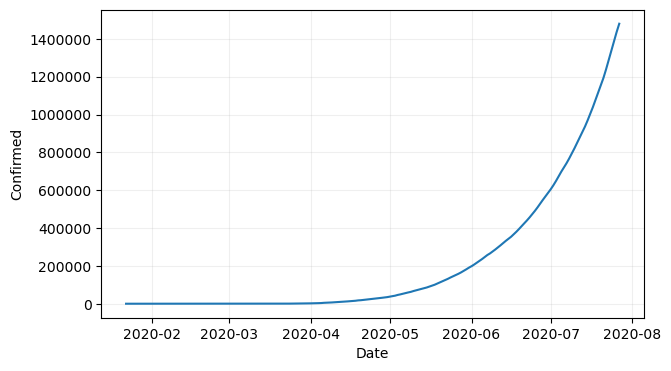

In [33]:
plt.figure(figsize = (7,4))
sns.lineplot(x = 'Date', y = 'Confirmed', data = india)
plt.ticklabel_format(style = 'plain' , axis = 'y')
plt.grid(True , alpha = .2)


#### Death and Recovery Rate in india

In [34]:
grouped_india = india.groupby('Country/Region')[['Confirmed','Deaths', 'Recovered','Active']].sum()

In [35]:
grouped_india

,Confirmed,Deaths,Recovered,Active
Country/Region,,,,
India,40883464,1111831,23783720,15987913


Text(0, 0.5, 'Cases')

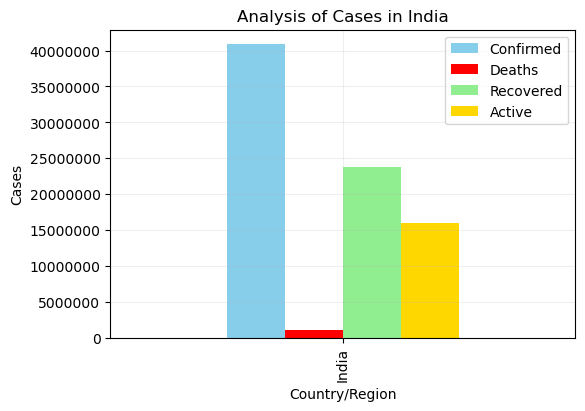

In [36]:
# graphical representation
colors = ['skyblue', 'red','lightgreen', 'gold']
plt.figure(figsize=(6,4))
grouped_india.plot(kind = 'bar', ax = plt.gca(), color = colors)
plt.ticklabel_format(style = 'plain' , axis = 'y')
plt.grid(True, alpha = .2)
plt.title('Analysis of Cases in India')
plt.ylabel('Cases')

In [37]:
Death_percent = grouped_india['Deaths']/grouped_india['Confirmed']*100
Death_percent.round(1)

Country/Region
India    2.7
dtype: float64

In [38]:
Recovered_percent = grouped_india['Recovered']/grouped_india['Confirmed']*100
Recovered_percent.round(1)

Country/Region
India    58.2
dtype: float64

### Insight:
- The death rate in India is 2.7%.
- The recovery rate in India is 58%.
- Approx 40% cases are active in india

### Forecasting

In [39]:
# preparing data

forecast_data = india[['Date', 'Confirmed']]
forecast_data.set_index('Date', inplace = True)
forecast_data = forecast_data[forecast_data['Confirmed'] > 0]
forecast_data

,Confirmed
Date,
2020-01-30,1
2020-01-31,1
2020-02-01,1
2020-02-02,2
2020-02-03,3
...,...
2020-07-23,1288108
2020-07-24,1337024
2020-07-25,1385635


Figure(640x480)


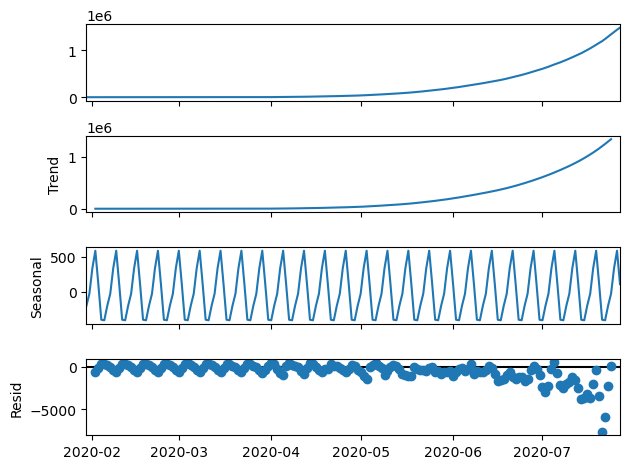

In [40]:
# checking data stationarity
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(forecast_data)
print(decomposition.plot())

In [41]:
# importing libraries for test
from statsmodels.tsa.stattools import adfuller
result = adfuller(forecast_data)
result[1]

0.9981728272762624

#### value is greater than 0.05 it means data is not stationary

In [42]:
# importing prophet libararies
from prophet import Prophet

In [43]:
# preparing data for model
data_prophet = forecast_data.reset_index()
data_prophet = data_prophet.rename(columns = {'Date':'ds','Confirmed': 'y'})
data_prophet

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,1
3,2020-02-02,2
4,2020-02-03,3
...,...,...
175,2020-07-23,1288108
176,2020-07-24,1337024
177,2020-07-25,1385635
178,2020-07-26,1435616


In [44]:
# Fitting the model:
model = Prophet()
model.fit(data_prophet)

15:42:44 - cmdstanpy - INFO - Chain [1] start processing
15:42:45 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
# forecasting:
future_data = model.make_future_dataframe(periods=60)
future_prediction = model.predict(future_data)

In [46]:
# assembling the data:
future_prediction = future_prediction[['ds','yhat']]

In [47]:
# normalize the value:
future_prediction['yhat'] = future_prediction['yhat'].apply(lambda x : '{:.2f}'.format(x))

In [48]:
# converting the datatype:
future_prediction['yhat'] = future_prediction['yhat'].astype('float64')

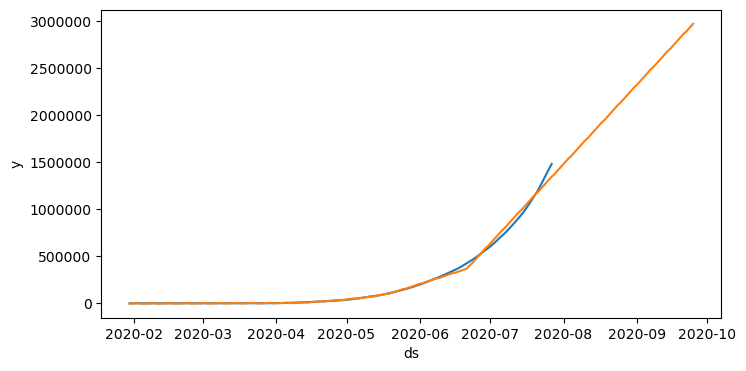

In [49]:
# graphical representation of future possibilties:
plt.figure(figsize = (8,4))
sns.lineplot(x = 'ds' , y = 'y' , data = data_prophet)
sns.lineplot(x = 'ds', y = 'yhat', data = future_prediction)
plt.ticklabel_format(style = 'plain', axis = 'y')

##### The Prophet model is performing well, effectively capturing trends and seasonality in the data. This makes it a reliable tool for accurate and consistent future forecasting in the project.

In [50]:
# Future prediction for two months
future_prediction.tail(60)

,ds,yhat
180,2020-07-28,1367728.72
181,2020-07-29,1395238.39
182,2020-07-30,1423344.62
183,2020-07-31,1451482.13
184,2020-08-01,1480090.45
185,2020-08-02,1508811.12
186,2020-08-03,1536147.29
187,2020-08-04,1557575.47
188,2020-08-05,1585085.14
189,2020-08-06,1613191.37


## Project Insights
##### Global Analysis:
- Overall Trend: The number of confirmed COVID-19 cases has shown significant growth over time, with notable peaks.

##### Top Affected Countries:

- The United States has the highest number of confirmed cases, approximately 220 million.
- India ranks fourth in confirmed cases, with around 40 million cases.

##### Death Rates:

- There are 9 countries with a death rate exceeding 10%, which is exceptionally high.
- The United Kingdom and France have particularly high death rates, both at 14%.

##### Low Death Rates:

- 14 countries have a death rate below 1% based on confirmed cases.
- The UAE has a death rate of 0.69%, and Sri Lanka has a rate of 0.66%.

##### Recovery Rates:

- 16 countries have a recovery rate of 81% or higher.
- China has achieved a recovery rate of 81%, while Thailand has a rate of 85%.
- 8 countries have a recovery rate below 10%.
- The United Kingdom has a notably low recovery rate of 0.47%.


### Analysis of India and Building a Time Series Model for Upcoming Case Trends
##### Current Status in India:

- Death rate: 2.7%
- Recovery rate: 58%
- Active cases: Approximately 40%

##### Model Performance:

- The Prophet model is performing well, effectively capturing trends and seasonality in the data, making it a reliable tool for accurate and consistent future forecasting.
- According to the model, there is a high possibility of increased cases in the future.


## Recommendations
##### Improve Healthcare Resources in High-Risk Countries
- Countries with high death rates like the UK and France should focus on increasing healthcare capacity and improving medical facilities.

##### Strengthen Preventive Measures in the US and India
- Both the US and India should focus on stricter preventive measures such as mass vaccinations, testing, and better social distancing to reduce case numbers.

##### Focus on Improving Recovery Rates in India
- India’s recovery rate is moderate, so improving access to healthcare, better treatment protocols, and timely medical intervention could help more people recover faster.

##### Provide More Medical Support in Low-Recovery Countries
- Countries like the UK with low recovery rates need to invest in better patient care and treatment strategies to improve recovery outcomes.

##### Leverage Successful Strategies from UAE and Sri Lanka
- Countries like the UAE and Sri Lanka have low death rates, and their approaches to early detection, timely treatment, and efficient healthcare systems can be adopted in other countries, including India.

##### Monitor Active Cases in India
- Since approximately 40% of COVID-19 cases in India are active, continuous monitoring, faster treatment, and isolation measures are critical to preventing further spread.








#                                             Thank you 